In [1]:
import tensorflow as tf
import pandas as pd 
from keras.utils import to_categorical
import random
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, array_to_img, img_to_array
from tensorflow.keras.models import Sequential
from glob import glob
import imgaug.augmenters as iaa
import matplotlib.pyplot as plt
import cv2

C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
# Define Constants by re-sizing all the images
IMAGE_SIZE = [224, 224]

train_path = 'kumbakonam_place'



In [3]:
# Function to display images
def display_images(images):
    fig, axes = plt.subplots(1, len(images), figsize=(12, 4))
    for img, ax in zip(images, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.show()

In [4]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
for layer in inception.layers:
    layer.trainable = False

In [6]:
folders = glob('mannargudi_places/*')
folders

['mannargudi_places\\bio fertility',
 'mannargudi_places\\CSI Church',
 'mannargudi_places\\elephant',
 'mannargudi_places\\finlay ground',
 'mannargudi_places\\finlay hostel',
 'mannargudi_places\\finlay scl',
 'mannargudi_places\\fish market',
 'mannargudi_places\\flower',
 'mannargudi_places\\ganapathi vilas scl',
 'mannargudi_places\\haridra nadhi',
 'mannargudi_places\\kaasi vishwanathar temple',
 'mannargudi_places\\kalki park',
 'mannargudi_places\\kopuram mittai',
 'mannargudi_places\\maiden colony',
 'mannargudi_places\\mannai narayanaswamy nagar',
 'mannargudi_places\\municipality',
 'mannargudi_places\\national scl',
 'mannargudi_places\\national scl ground',
 'mannargudi_places\\oil mill',
 'mannargudi_places\\old housing unit',
 'mannargudi_places\\pamani river',
 'mannargudi_places\\puthur',
 'mannargudi_places\\quaters',
 'mannargudi_places\\railway station',
 'mannargudi_places\\rajagopalaswamy temple',
 'mannargudi_places\\rukkumani kulam',
 'mannargudi_places\\saviour

In [7]:
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [8]:
model = Model(inputs=inception.input, outputs=prediction)

# View the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

 conv2d_11 (Conv2D)          (None, 25, 25, 32)           6144      ['average_pooling2d[0][0]']   
                                                                                                  
 batch_normalization_5 (Bat  (None, 25, 25, 64)           192       ['conv2d_5[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_7 (Bat  (None, 25, 25, 64)           192       ['conv2d_7[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_10 (Ba  (None, 25, 25, 96)           288       ['conv2d_10[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_17 (Activation)  (None, 25, 25, 96)           0         ['batch_normalization_17[0][0]
                                                                    ']                            
                                                                                                  
 activation_18 (Activation)  (None, 25, 25, 64)           0         ['batch_normalization_18[0][0]
                                                                    ']                            
                                                                                                  
 mixed1 (Concatenate)        (None, 25, 25, 288)          0         ['activation_12[0][0]',       
                                                                     'activation_14[0][0]',       
                                                                     'activation_17[0][0]',       
          

                                                                                                  
 conv2d_28 (Conv2D)          (None, 25, 25, 96)           55296     ['activation_27[0][0]']       
                                                                                                  
 batch_normalization_28 (Ba  (None, 25, 25, 96)           288       ['conv2d_28[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_28 (Activation)  (None, 25, 25, 96)           0         ['batch_normalization_28[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_26 (Conv2D)          (None, 12, 12, 384)          995328    ['mixed2[0][0]']              
          

 conv2d_30 (Conv2D)          (None, 12, 12, 192)          147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_33 (Conv2D)          (None, 12, 12, 192)          172032    ['activation_32[0][0]']       
                                                                                                  
 conv2d_38 (Conv2D)          (None, 12, 12, 192)          172032    ['activation_37[0][0]']       
                                                                                                  
 conv2d_39 (Conv2D)          (None, 12, 12, 192)          147456    ['average_pooling2d_3[0][0]'] 
                                                                                                  
 batch_normalization_30 (Ba  (None, 12, 12, 192)          576       ['conv2d_30[0][0]']           
 tchNormalization)                                                                                
          

                                                                    ']                            
                                                                                                  
 average_pooling2d_4 (Avera  (None, 12, 12, 768)          0         ['mixed4[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_40 (Conv2D)          (None, 12, 12, 192)          147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_43 (Conv2D)          (None, 12, 12, 192)          215040    ['activation_42[0][0]']       
                                                                                                  
 conv2d_48 (Conv2D)          (None, 12, 12, 192)          215040    ['activation_47[0][0]']       
          

                                                                                                  
 activation_52 (Activation)  (None, 12, 12, 160)          0         ['batch_normalization_52[0][0]
                                                                    ']                            
                                                                                                  
 activation_57 (Activation)  (None, 12, 12, 160)          0         ['batch_normalization_57[0][0]
                                                                    ']                            
                                                                                                  
 average_pooling2d_5 (Avera  (None, 12, 12, 768)          0         ['mixed5[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_50

 batch_normalization_62 (Ba  (None, 12, 12, 192)          576       ['conv2d_62[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_67 (Ba  (None, 12, 12, 192)          576       ['conv2d_67[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_62 (Activation)  (None, 12, 12, 192)          0         ['batch_normalization_62[0][0]
                                                                    ']                            
                                                                                                  
 activation_67 (Activation)  (None, 12, 12, 192)          0         ['batch_normalization_67[0][0]
          

                                                                                                  
 conv2d_71 (Conv2D)          (None, 5, 5, 320)            552960    ['activation_70[0][0]']       
                                                                                                  
 conv2d_75 (Conv2D)          (None, 5, 5, 192)            331776    ['activation_74[0][0]']       
                                                                                                  
 batch_normalization_71 (Ba  (None, 5, 5, 320)            960       ['conv2d_71[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_75 (Ba  (None, 5, 5, 192)            576       ['conv2d_75[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_82 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_82[0][0]
                                                                    ']                            
                                                                                                  
 activation_83 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_83[0][0]
                                                                    ']                            
                                                                                                  
 batch_normalization_84 (Ba  (None, 5, 5, 192)            576       ['conv2d_84[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activatio

                                                                                                  
 activation_88 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_88[0][0]
                                                                    ']                            
                                                                                                  
 activation_91 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_91[0][0]
                                                                    ']                            
                                                                                                  
 activation_92 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_92[0][0]
                                                                    ']                            
                                                                                                  
 batch_nor

In [9]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [10]:
# Using the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
# Training Generator
training_set = train_datagen.flow_from_directory('mannargudi_places',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 426 images belonging to 36 classes.


In [12]:
# Testing Generator
test_set = test_datagen.flow_from_directory('mannargudi_places',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 426 images belonging to 36 classes.


In [13]:
# fit the model, it will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\user\AppData\Local\Temp\ipykernel_9184\2470280257.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/100
14/14 [==============================] - 122s 8s/step - loss: 24.9288 - accuracy: 0.1972 - val_loss: 11.3127 - val_accuracy: 0.3662
Epoch 2/100
14/14 [==============================] - 114s 9s/step - loss: 8.2745 - accuracy: 0.5235 - val_loss: 3.5728 - val_accuracy: 0.7300
Epoch 3/100
14/14 [==============================] - 108s 8s/step - loss: 3.2412 - accuracy: 0.7371 - val_loss: 1.1437 - val_accuracy: 0.8732
Epoch 4/100
14/14 [==============================] - 111s 8s/step - loss: 1.4425 - accuracy: 0.8286 - val_loss: 0.6409 - val_accuracy: 0.8897
Epoch 5/100
14/14 [==============================] - 102s 7s/step - loss: 0.8666 - accuracy: 0.8756 - val_loss: 0.3144 - val_accuracy: 0.9554
Epoch 6/100
14/14 [==============================] - 104s 8s/step - loss: 0.5991 - accuracy: 0.8944 - val_loss: 0.1776 - val_accuracy: 0.9718
Epoch 7/100
14/14 [==============================] - 107s 8s/step - loss: 0.4341 - accuracy: 0.9531 - val_loss: 0.0912 - val_accuracy: 0.9859
Epoc

14/14 [==============================] - 59s 4s/step - loss: 0.0365 - accuracy: 0.9906 - val_loss: 0.0189 - val_accuracy: 0.9977
Epoch 59/100
14/14 [==============================] - 58s 4s/step - loss: 0.0455 - accuracy: 0.9953 - val_loss: 0.0290 - val_accuracy: 0.9977
Epoch 60/100
14/14 [==============================] - 58s 4s/step - loss: 0.0757 - accuracy: 0.9883 - val_loss: 0.0279 - val_accuracy: 0.9953
Epoch 61/100
14/14 [==============================] - 58s 4s/step - loss: 0.0833 - accuracy: 0.9906 - val_loss: 0.0019 - val_accuracy: 0.9977
Epoch 62/100
14/14 [==============================] - 57s 4s/step - loss: 0.0765 - accuracy: 0.9883 - val_loss: 3.7159e-04 - val_accuracy: 1.0000
Epoch 63/100
14/14 [==============================] - 58s 4s/step - loss: 0.0359 - accuracy: 0.9930 - val_loss: 0.0069 - val_accuracy: 0.9977
Epoch 64/100
14/14 [==============================] - 57s 4s/step - loss: 0.1150 - accuracy: 0.9930 - val_loss: 0.0131 - val_accuracy: 0.9977
Epoch 65/100
14

In [14]:
from sklearn.metrics import classification_report
predictions = model.predict(test_set)

# Convert predictions to class labels
predicted_classes = [np.argmax(prediction) for prediction in predictions]

# Convert true labels to class labels
true_classes = test_set.classes

# Get the class labels
class_labels = list(test_set.class_indices.keys())

# Generate classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)

print(report)

14/14 [==============================] - 29s 2s/step
                            precision    recall  f1-score   support

                CSI Church       0.00      0.00      0.00         6
        Selliyamman Temple       0.00      0.00      0.00         5
             bio fertility       0.00      0.00      0.00         5
                  elephant       0.12      0.12      0.12        32
             finlay ground       0.00      0.00      0.00        11
             finlay hostel       0.00      0.00      0.00         2
                finlay scl       0.00      0.00      0.00        15
               fish market       0.00      0.00      0.00         2
                    flower       0.00      0.00      0.00         5
       ganapathi vilas scl       0.00      0.00      0.00         2
             haridra nadhi       0.07      0.07      0.07        15
 kaasi vishwanathar temple       0.00      0.00      0.00         8
                kalki park       0.00      0.00      0.00     

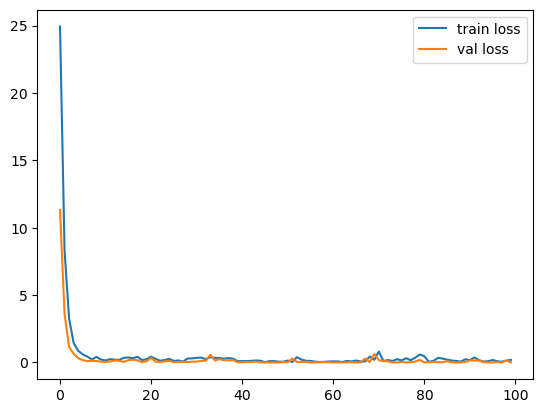

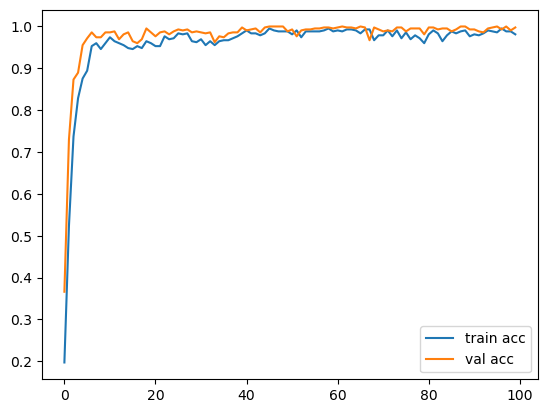

<Figure size 640x480 with 0 Axes>

In [15]:
# Plot the Loss and Accuracy
# Loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
# Saving the model as a h5 file

from tensorflow.keras.models import load_model
model.save('model_inception.h5')

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
y_pred = model.predict(test_set)
y_pred

14/14 [==============================] - 26s 2s/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.0357890e-32, 4.1647675e-20, 1.3149875e-15, ..., 0.0000000e+00,
        0.0000000e+00, 3.7490902e-18],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [18]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([13, 19,  3,  4, 20, 25, 25, 28, 11, 25, 33, 25,  6, 25, 25, 23, 21,
        3, 32, 22,  4,  3, 33, 13,  5, 21, 13, 17, 32, 24, 33, 25, 25,  9,
        1, 29, 23, 26, 25, 17, 25, 25,  2, 25, 23, 23, 13, 13, 25, 16, 13,
       23, 21, 10,  3, 32, 17,  2, 21,  3,  0, 25,  3,  6, 19, 25,  3, 23,
       25, 21, 21, 24, 28, 12, 30, 30, 25, 25,  6, 10, 16,  8, 13, 26, 25,
        4, 24, 17,  6, 24,  3, 10, 25, 25, 25, 25, 11,  3, 25, 24, 25, 25,
       23, 25, 18, 25, 16, 20, 14, 30, 27, 13, 32, 35, 15, 15, 35, 20,  3,
       10,  3, 10, 20, 20, 10, 16, 25, 13,  3, 35, 31, 23,  6, 25, 29, 21,
       25,  1, 30,  3, 34, 26, 17, 25,  6,  9,  6, 23, 10, 17, 26, 35, 16,
       20, 26, 25, 13, 10, 18, 32, 25, 20, 17, 22, 24,  3, 27, 17, 26, 26,
       25, 16, 33, 23, 21, 24, 25, 11, 25, 17, 24,  0, 25, 12, 24, 21, 25,
       25, 28, 35, 25, 29, 23, 25,  6, 13,  3, 25, 13, 25, 18,  3,  0, 11,
       25, 24, 25, 28, 14, 25, 27, 26, 32, 22,  8, 25, 23, 22, 25, 21, 24,
       32,  3, 17,  3,  6